<a href="https://colab.research.google.com/github/Devampatel94/Devamaptel94.github.io/blob/main/Copy_of_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/X-ray-20231027T074754Z-002/X-ray')

import shutil


source_directory = '/content/drive/My Drive/X-ray-20231027T074754Z-002'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## DATA VISUALIZATION

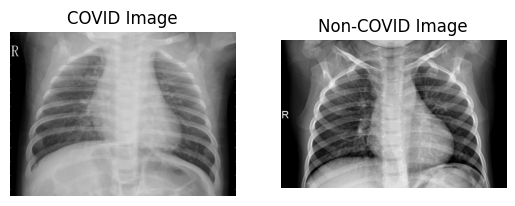

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Define the path to the directory containing COVID and Non-COVID images
dataset_path = '//content/drive/MyDrive/X-ray-20231027T074754Z-002/X-ray'

# Define paths to random COVID and Non-COVID images
covid_image_path = os.path.join(dataset_path, 'COVID', os.listdir(os.path.join(dataset_path, 'COVID'))[2])
non_covid_image_path = os.path.join(dataset_path, 'Non-COVID', os.listdir(os.path.join(dataset_path, 'Non-COVID'))[602])

# Load and display the COVID image in black and white
covid_image = Image.open(covid_image_path)
plt.subplot(1, 2, 1)
plt.title("COVID Image")
plt.imshow(covid_image, cmap='gray')
plt.axis('off')

# Load and display the Non-COVID image in color
non_covid_image = Image.open(non_covid_image_path)
plt.subplot(1, 2, 2)
plt.title("Non-COVID Image")
plt.imshow(non_covid_image, cmap='gray')
plt.axis('off')

plt.show()


## IMAGE ENHANCEMENT USING HISTOGRAM EQUILIZATION

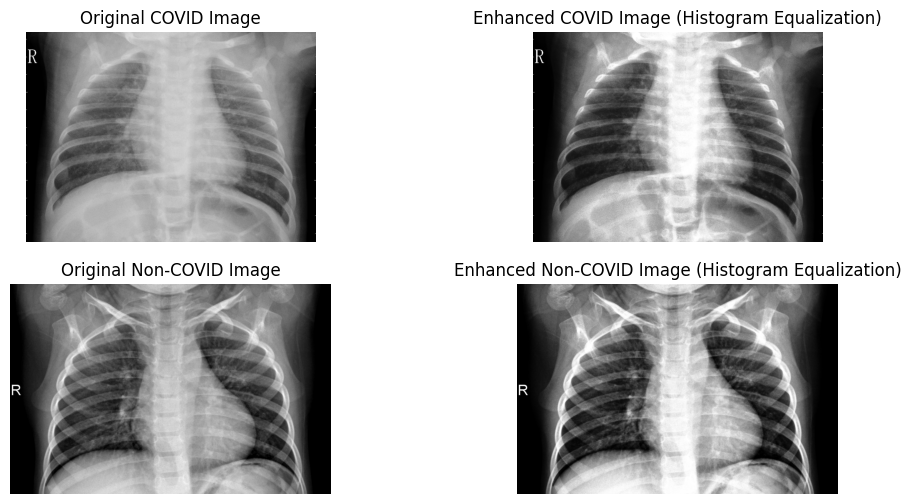

In [ ]:
import cv2

# Load the COVID image
covid_image = cv2.imread(covid_image_path, cv2.IMREAD_GRAYSCALE)

# Apply histogram equalization to the COVID image
covid_image_equalized = cv2.equalizeHist(covid_image)

# Load the Non-COVID image
non_covid_image = cv2.imread(non_covid_image_path, cv2.IMREAD_GRAYSCALE)

# Apply histogram equalization to the Non-COVID image
non_covid_image_equalized = cv2.equalizeHist(non_covid_image)

# Display the enhanced images
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.title("Original COVID Image")
plt.imshow(covid_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title("Enhanced COVID Image (Histogram Equalization)")
plt.imshow(covid_image_equalized, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title("Original Non-COVID Image")
plt.imshow(non_covid_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title("Enhanced Non-COVID Image (Histogram Equalization)")
plt.imshow(non_covid_image_equalized, cmap='gray')
plt.axis('off')

plt.show()


## ENHANCING ALL THE IMAGES AND SAVING THEM IN DIRECTORY(DO NOT RUN THIS CELL)

In [ ]:
# import cv2
# import os
# from PIL import Image

# # Define the path to the directory containing COVID and Non-COVID images
# dataset_path = '/content/drive/MyDrive/X-ray-20231027T074754Z-002/X-ray'

# # Create directories to store the enhanced images
# enhanced_covid_dir = os.path.join(dataset_path, 'Enhanced_COVID_Images')
# os.makedirs(enhanced_covid_dir, exist_ok=True)

# enhanced_non_covid_dir = os.path.join(dataset_path, 'Enhanced_Non-COVID_Images')
# os.makedirs(enhanced_non_covid_dir, exist_ok=True)

# # Function to apply histogram equalization to an image
# def apply_histogram_equalization(image_path):
#     image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
#     equalized_image = cv2.equalizeHist(image)
#     return equalized_image

# # Process and save all COVID images
# covid_dir = os.path.join(dataset_path, 'COVID')
# for filename in os.listdir(covid_dir):
#     if filename.lower().endswith(('.jpg', '.jpeg', '.png')):  # Process various image formats
#         image_path = os.path.join(covid_dir, filename)
#         enhanced_image = apply_histogram_equalization(image_path)
#         enhanced_pil_image = Image.fromarray(enhanced_image)

#         # Save the enhanced image with "enhanced_" prefix to the Enhanced_COVID_Images folder
#         enhanced_pil_image.save(os.path.join(enhanced_covid_dir, 'enhanced_' + filename))

# # Process and save all Non-COVID images
# non_covid_dir = os.path.join(dataset_path, 'Non-COVID')
# for filename in os.listdir(non_covid_dir):
#     if filename.lower().endswith(('.jpg', '.jpeg', '.png')):  # Process various image formats
#         image_path = os.path.join(non_covid_dir, filename)
#         enhanced_image = apply_histogram_equalization(image_path)
#         enhanced_pil_image = Image.fromarray(enhanced_image)

#         # Save the enhanced image with "enhanced_" prefix to the Enhanced_Non-COVID_Images folder
#         enhanced_pil_image.save(os.path.join(enhanced_non_covid_dir, 'enhanced_' + filename))


## DATA PREPROCESSING

In [ ]:
data = []
labels = []
covid_folder = os.path.join(dataset_path, 'Enhanced_COVID_Images')
non_covid_folder = os.path.join(dataset_path, 'Enhanced_Non-COVID_Images')
# ASSIGN LABEL 'COVID-POSITIVE' TO COVID IMAGES
for filename in os.listdir(covid_folder):
    file_path = os.path.join(covid_folder, filename)
    data.append(file_path)
    labels.append('COVID-POSITIVE')

# ASSIGN LABEL 'COVID-NEGATIVE' TO NON-COVID IMAGES
for filename in os.listdir(non_covid_folder):
    file_path = os.path.join(non_covid_folder, filename)
    data.append(file_path)
    labels.append('COVID-NEGATIVE')

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.DataFrame({'Data': data, 'Label': labels})
# Split the data into training and testing sets
X = df['Data']
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
num_samples_to_check = 10  # Adjust this number as needed

for i in range(num_samples_to_check):
    print(f"Data: {data[i]}")
    print(f"Label: {labels[i]}")
    print()

Data: //content/drive/MyDrive/X-ray-20231027T074754Z-002/X-ray/Enhanced_COVID_Images/enhanced_aug_353889E0-A1E8-4F9E-A0B8-F24F36BCFBFB._avg_0.jpg
Label: COVID-POSITIVE

Data: //content/drive/MyDrive/X-ray-20231027T074754Z-002/X-ray/Enhanced_COVID_Images/enhanced_aug_covid-19-pneumonia-14-PA_PL_4.jpg
Label: COVID-POSITIVE

Data: //content/drive/MyDrive/X-ray-20231027T074754Z-002/X-ray/Enhanced_COVID_Images/enhanced_aug_covid-19-pneumonia-14-PA_avg_0.jpg
Label: COVID-POSITIVE

Data: //content/drive/MyDrive/X-ray-20231027T074754Z-002/X-ray/Enhanced_COVID_Images/enhanced_aug_353889E0-A1E8-4F9E-A0B8-F24F36BCFBFB._PL_2.jpg
Label: COVID-POSITIVE

Data: //content/drive/MyDrive/X-ray-20231027T074754Z-002/X-ray/Enhanced_COVID_Images/enhanced_aug_353889E0-A1E8-4F9E-A0B8-F24F36BCFBFB._PL_1.jpg
Label: COVID-POSITIVE

Data: //content/drive/MyDrive/X-ray-20231027T074754Z-002/X-ray/Enhanced_COVID_Images/enhanced_aug_covid-19-pneumonia-15-PA_avg_0.jpg
Label: COVID-POSITIVE

Data: //content/drive/MyDriv

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Define image dimensions
image_height = 150
image_width = 150
num_channels = 2
# Create an ImageDataGenerator with preprocessing and augmentation options
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest'
)


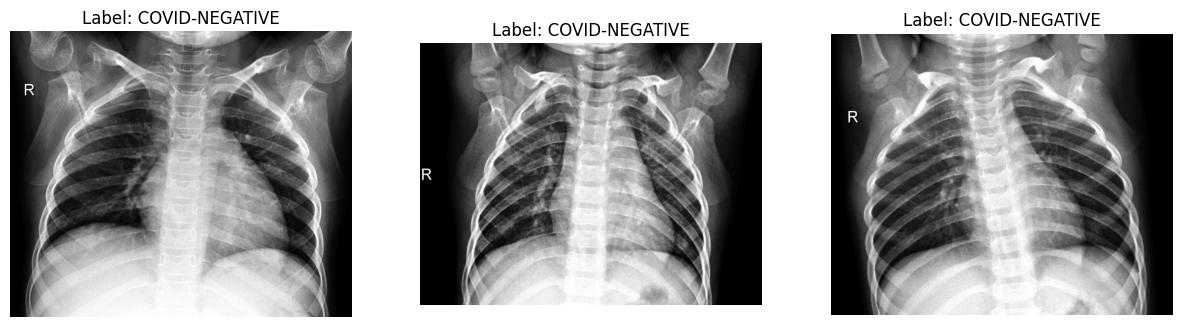

In [ ]:
import random

 # Use ImageDataGenerator with flow_from_dataframe

# data, labels = train_generator.next()
data = np.array(data)
labels = np.array(labels)
# Choose 3 random image indices
random_indices = random.sample(range(data.shape[0]), 3)
image_directory = '/content/drive/My Drive/X-ray-20231027T074754Z-002/X-ray'

# Get the random image paths
random_image_paths = [data[i] for i in random_indices]

# Create a subplot with 1 row and 3 columns
plt.figure(figsize=(15, 5))
for i, random_image_path in enumerate(random_image_paths, 1):
    plt.subplot(1, 3, i)


    image = cv2.imread(os.path.join(image_directory, random_image_path))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)


    label = labels[random_indices[i - 1]]
    plt.title(f'Label: {label}')
    plt.axis('off')

plt.show()

In [ ]:
import cv2
import numpy as np
import concurrent.futures
from tqdm import tqdm


df['Data'] = df['Data'].astype(str)

# Define the number of channels
num_channels = 2

# Define the target size for resizing
target_size = (150, 150)

# Function to process an image with error handling and logging
def process_image(image_path):
    try:
        img = cv2.imread(image_path)
        img = cv2.resize(img, target_size)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        return img
    except Exception as e:
        # print(f"Error processing image: {image_path}")
        # print(f"Error message: {str(e)}")
        return None


num_workers = 3


X = np.empty((2083, *target_size, num_channels))
with concurrent.futures.ThreadPoolExecutor(max_workers=num_workers) as executor:
    futures = [executor.submit(process_image, row['Data']) for _, row in df.iterrows()]
    for i, future in enumerate(tqdm(concurrent.futures.as_completed(futures), total=2083, unit='image', desc='Processing images')):
        img = future.result()
        if img is not None:
            X[i, :, :, 0] = img
            X[i, :, :, 1] = img

# X is now a NumPy array with shape (number_of_images, 150, 150, 2)

print(X.shape)


Processing images: 100%|██████████| 2083/2083 [05:02<00:00,  6.88image/s]

(2083, 150, 150, 2)


In [ ]:
X = X/255

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape

(1666, 150, 150, 2)

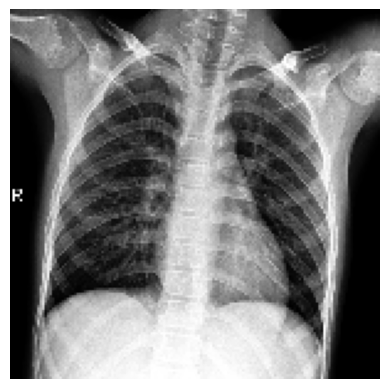

'COVID-POSITIVE'

In [ ]:
import matplotlib.pyplot as plt

# Select an image from X_train
image_to_display = X_train[555][:, :, 0]  # Use the first channel for grayscale data

# Display the image using Matplotlib
plt.imshow(image_to_display, cmap='gray')
plt.axis('off')
plt.show()
y_train[200]

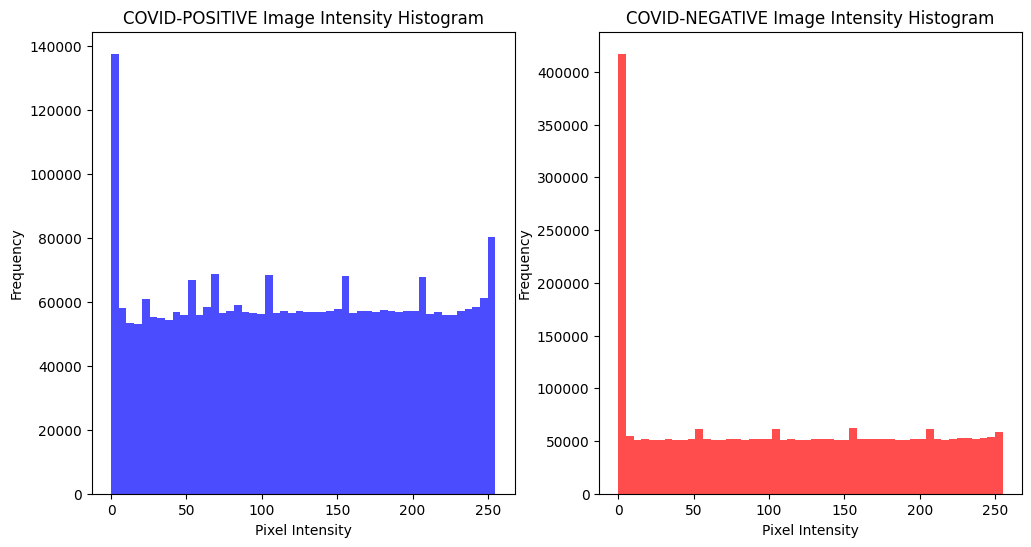

In [ ]:
plt.figure(figsize=(12, 6))
for i, label in enumerate(['COVID-POSITIVE', 'COVID-NEGATIVE']):
    plt.subplot(1, 2, i + 1)
    images = df[df['Label'] == label]['Data'][:300]  # Sample the first 300 images
    intensity_values = []
    for image_path in images:
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:  # Check if image loading was successful
            img = cv2.resize(img, (100, 100))  # Resize the image to a lower resolution
            intensity_values.extend(img.ravel())
    plt.hist(intensity_values, bins=50, color='b' if i == 0 else 'r', alpha=0.7)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.title(f'{label} Image Intensity Histogram')
plt.show()


## FEATURE EXTRACTION

<ipython-input-16-27c7a8b3f006>:10: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  features, hog_image = hog(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, multichannel=False)
<ipython-input-16-27c7a8b3f006>:34: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  hog_features_array = np.array(hog_features_list)
<ipython-input-16-27c7a8b3f006>:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  hog_images_array = np.array(hog_images_list)


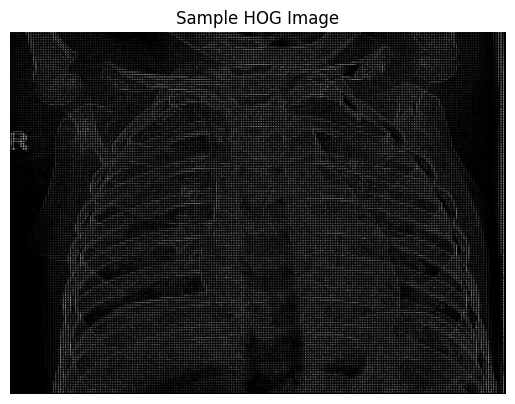

In [ ]:


import os
import cv2
import numpy as np
from skimage.feature import hog
from skimage import exposure

# Function to compute HOG features for an image
def compute_hog_features(image):
    # Compute HOG features
    features, hog_image = hog(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, multichannel=False)


    hog_image = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    return features, hog_image

# List to store computed HOG features and HOG images
hog_features_list = []
hog_images_list = []

# Process and compute HOG features for all images
for image_path in images:
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Compute HOG features and HOG image
    features, hog_image = compute_hog_features(image)

    # Append features and HOG image to the lists
    hog_features_list.append(features)
    hog_images_list.append(hog_image)

# Convert the lists to NumPy arrays
hog_features_array = np.array(hog_features_list)
hog_images_array = np.array(hog_images_list)

# Display a sample HOG image
sample_hog_image = hog_images_array[0]
plt.imshow(sample_hog_image, cmap='gray')
plt.title('Sample HOG Image')
plt.axis('off')
plt.show()


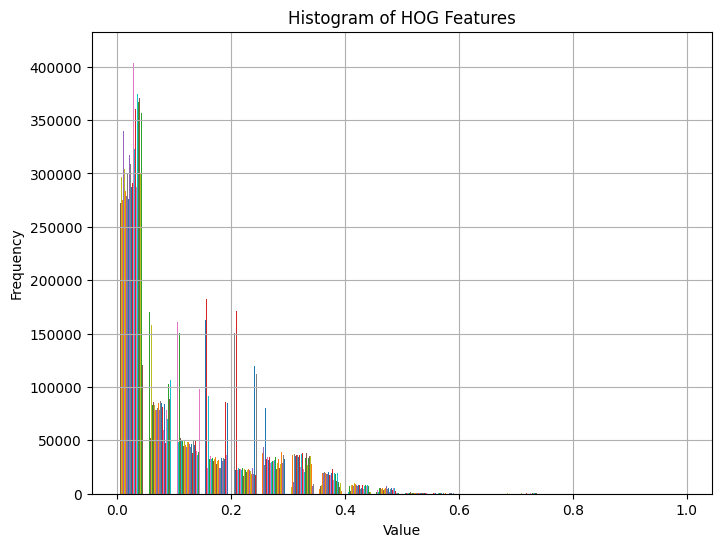

In [ ]:
import matplotlib.pyplot as plt

# Assuming hog_features_array is a 1D array
hog_features = hog_features_array

plt.figure(figsize=(8, 6))
plt.hist(hog_features, bins=20)  # Adjust the number of bins as needed
plt.title('Histogram of HOG Features')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid()
plt.show()


In [ ]:
X1 = np.array(hog_features_list)
y1 = np.array(hog_images_list)

<ipython-input-19-861a42ce3b57>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X1 = np.array(hog_features_list)
<ipython-input-19-861a42ce3b57>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y1 = np.array(hog_images_list)


In [ ]:
import numpy as np
import cv2
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming X_train, X_test, y_train, y_test are already defined with shape (samples, height, width, channels)

# Reshape the data to (samples, height * width * channels)
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

# Standardize the feature values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reshaped)
X_test_scaled = scaler.transform(X_test_reshaped)

# Models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Support Vector Machine': SVC(kernel='linear', random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Naive Bayes': GaussianNB()
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    print(f'Model: {name}')
    print(f'Accuracy: {accuracy}')
    print(f'Confusion Matrix:\n{conf_matrix}')
    print(f'Classification Report:\n{classification_rep}')
    print('---------------------')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Accuracy: 0.9376498800959233
Confusion Matrix:
[[298  17]
 [  9  93]]
Classification Report:
                precision    recall  f1-score   support

COVID-NEGATIVE       0.97      0.95      0.96       315
COVID-POSITIVE       0.85      0.91      0.88       102

      accuracy                           0.94       417
     macro avg       0.91      0.93      0.92       417
  weighted avg       0.94      0.94      0.94       417

---------------------
Model: Support Vector Machine
Accuracy: 0.9448441247002398
Confusion Matrix:
[[307   8]
 [ 15  87]]
Classification Report:
                precision    recall  f1-score   support

COVID-NEGATIVE       0.95      0.97      0.96       315
COVID-POSITIVE       0.92      0.85      0.88       102

      accuracy                           0.94       417
     macro avg       0.93      0.91      0.92       417
  weighted avg       0.94      0.94      0.94       417

---------------------
Model: K-Nearest Neighbors
Accuracy

In [ ]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    print(f'Model: {name}')
    print(f'Accuracy: {accuracy}')
    print(f'Confusion Matrix:\n{conf_matrix}')
    print(f'Classification Report:\n{classification_rep}')
    print('---------------------')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Accuracy: 0.9376498800959233
Confusion Matrix:
[[298  17]
 [  9  93]]
Classification Report:
                precision    recall  f1-score   support

COVID-NEGATIVE       0.97      0.95      0.96       315
COVID-POSITIVE       0.85      0.91      0.88       102

      accuracy                           0.94       417
     macro avg       0.91      0.93      0.92       417
  weighted avg       0.94      0.94      0.94       417

---------------------
Model: Support Vector Machine
Accuracy: 0.9448441247002398
Confusion Matrix:
[[307   8]
 [ 15  87]]
Classification Report:
                precision    recall  f1-score   support

COVID-NEGATIVE       0.95      0.97      0.96       315
COVID-POSITIVE       0.92      0.85      0.88       102

      accuracy                           0.94       417
     macro avg       0.93      0.91      0.92       417
  weighted avg       0.94      0.94      0.94       417

---------------------
Model: K-Nearest Neighbors
Accuracy